/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8049 - loss: 0.3967 - val_accuracy: 0.9430 - val_loss: 0.1241
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9630 - loss: 0.0879 - val_accuracy: 0.9580 - val_loss: 0.1135
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9828 - loss: 0.0482 - val_accuracy: 0.9660 - val_loss: 0.0885
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9862 - loss: 0.0358 - val_accuracy: 0.9700 - val_loss: 0.0728
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9914 - loss: 0.0271 - val_accuracy: 0.9690 - val_loss: 0.0702
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0204 - val_accuracy: 0.9760 - val_loss: 0.0729
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0198 - val_accuracy: 0.9730 - val_loss: 0.0756
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9958 - loss: 0.0148 - val_accuracy: 0.

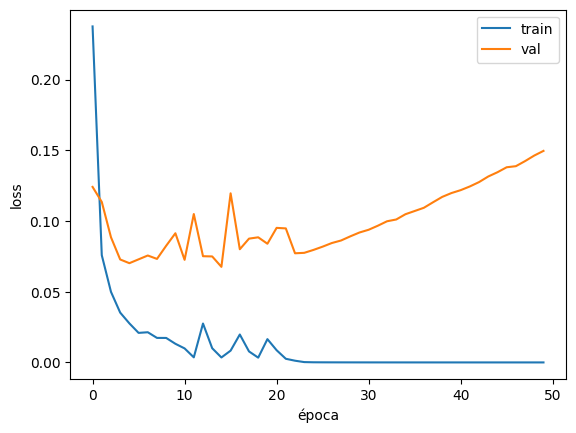

Loss: 0.1496 | Accuracy: 0.9810
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


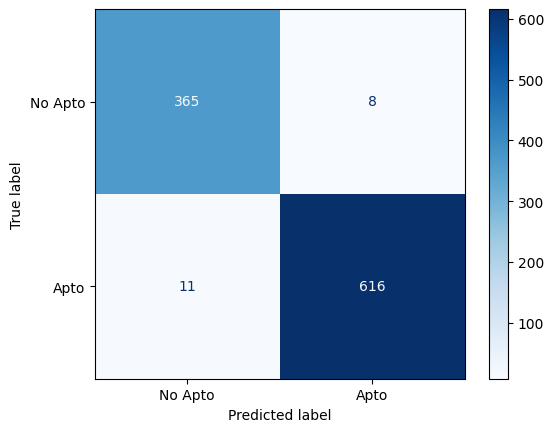

Recall por clase: [0.97855228 0.98245614]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Resultado: Apto


In [1]:
import numpy as np, pandas as pd                      # Librerías base
from sklearn.model_selection import train_test_split   # Partir datos
from sklearn.preprocessing import StandardScaler       # Escalar std
from tensorflow.keras.models import Sequential         # Red neuronal
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

# Genera dataset sintetico con diferentes rangos de habilidad
n = 5000
tec = np.random.randint(70, 101, (n, 6))   # 6 habiidades técnicas 70-100
mat = np.random.randint(60, 91, (n, 6))    # 6 habilidades matematicas 60-90
psi = np.random.randint(50, 86, (n, 6))    # 6 habilidades psicologicas 50-85

#  Nombre de columnas
cols = ['python','sql','viz','excel','apis','nube',
        'stats','prob','algebra','calc','opti','model',
        'team','comm','creat','adapt','lead','solve']
df = pd.DataFrame(np.hstack([tec, mat, psi]), columns=cols)

# Promedio por bloque y etiqueta
prom_tec = df[cols[0:6]].mean(1)
prom_mat = df[cols[6:12]].mean(1)
prom_psi = df[cols[12:18]].mean(1)
y = ((prom_tec + prom_mat + prom_psi)/3 > 75).astype(int)  # 1 = apto
y = pd.get_dummies(y).values                # Indicador de variables

#  Escalamiento
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#  Red neuronal
modelo = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])
modelo.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#  Entrenamiento
history = modelo.fit(X_train, y_train, epochs=50, batch_size=8,
                     validation_data=(X_test, y_test), verbose=1)

#  Gráfico de pérdida
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend(), plt.xlabel('época'), plt.ylabel('loss'), plt.show()

#  Métricas finales
loss, acc = modelo.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss:.4f} | Accuracy: {acc:.4f}')

#  Matriz de confusión y sensibilidad
y_pred = np.argmax(modelo.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Apto','Apto'])
disp.plot(cmap='Blues'), plt.show()
print('Recall por clase:', recall_score(y_true, y_pred, average=None))

#  Predecir nuevo candidato
nuevo = np.array([[90,88,85,87,84,89,82,86,85,83,87,80,70,75,80,72,78,74]])
nuevo = scaler.transform(nuevo)
print('Resultado:', 'Apto' if np.argmax(modelo.predict(nuevo))==1 else 'No Apto')